In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Step 1: Loading the dataset
df = pd.read_excel("AnomaData.xlsx")

In [3]:
# Display the first few rows to understand the structure
print(df.head())

                 time  y        x1        x2        x3         x4        x5  \
0 1999-05-01 00:00:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1 1999-05-01 00:02:00  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2 1999-05-01 00:04:00  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3 1999-05-01 00:06:00  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4 1999-05-01 00:08:00  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  1

In [3]:
# Check dimensions of the dataset
print("Dataset dimensions:", df.shape)

Dataset dimensions: (18398, 62)


In [4]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    18398 non-null  datetime64[ns]
 1   y       18398 non-null  int64         
 2   x1      18398 non-null  float64       
 3   x2      18398 non-null  float64       
 4   x3      18398 non-null  float64       
 5   x4      18398 non-null  float64       
 6   x5      18398 non-null  float64       
 7   x6      18398 non-null  float64       
 8   x7      18398 non-null  float64       
 9   x8      18398 non-null  float64       
 10  x9      18398 non-null  float64       
 11  x10     18398 non-null  float64       
 12  x11     18398 non-null  float64       
 13  x12     18398 non-null  float64       
 14  x13     18398 non-null  float64       
 15  x14     18398 non-null  float64       
 16  x15     18398 non-null  float64       
 17  x16     18398 non-null  float64       
 18  x17   

In [5]:
# Summary statistics
print(df.describe())

                  y            x1            x2            x3            x4  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006740      0.011824      0.157986      0.569300     -9.958345   
std        0.081822      0.742875      4.939762      5.937178    131.033712   
min        0.000000     -3.787279    -17.316550    -18.198509   -322.781610   
25%        0.000000     -0.405681     -2.158235     -3.537054   -111.378372   
50%        0.000000      0.128245     -0.075505     -0.190683    -14.881585   
75%        0.000000      0.421222      2.319297      3.421223     92.199134   
max        1.000000      3.054156     16.742105     15.900116    334.694098   

                 x5            x6            x7            x8            x9  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.006518      2.387533      0.001647     -0.004125     -0.003056   
std        0.634054     37.104012      0.108870    

In [7]:
# Check for missing values
count_of_duplicate_rows = df.isnull().sum()
print(count_of_duplicate_rows)

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [8]:
# Treat missing values if any
df.dropna(inplace=True)

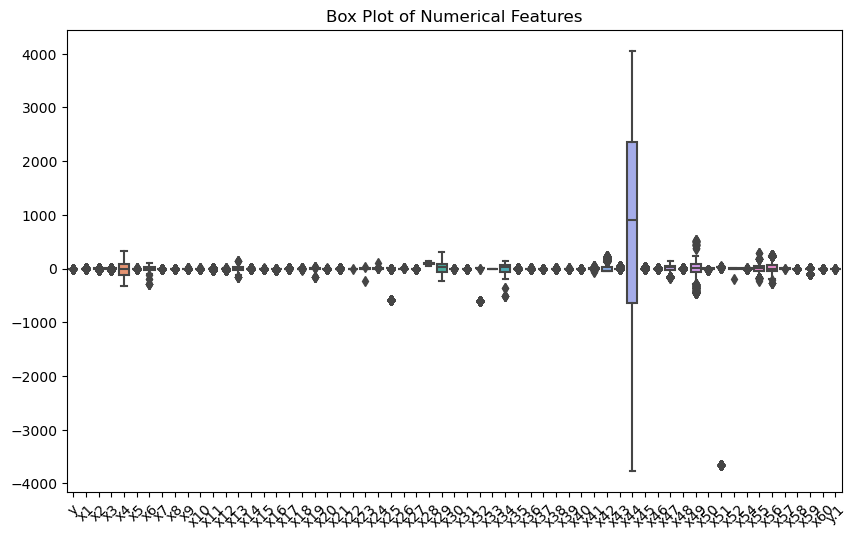

In [9]:
# box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [10]:
# Handling outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [11]:
# Apply remove_outliers function to each numeric column
numeric_columns = df.select_dtypes(include=['number']).columns
for col in numeric_columns:
    data = remove_outliers(df, col)

C:\Users\vinut\AppData\Local\Temp\ipykernel_6232\3551398421.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sum_x'] = data.iloc[:, 2:53].sum(axis=1)


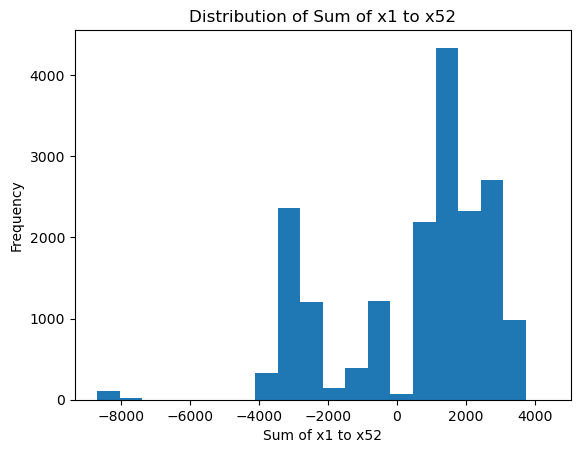

In [12]:
# Feature Engineering: Creating new features
# Example 1: Aggregating features
# Sum of x1 to x52
data['sum_x'] = data.iloc[:, 2:53].sum(axis=1) 
data['sum_x'].head()

plt.hist(data['sum_x'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Sum of x1 to x52')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of x1 to x52')
plt.show()

In [13]:
# Example 2: Feature transformation
 # Square of x1
data['x1_squared'] = data['x1'] ** 2
data['x1_squared'].head()

C:\Users\vinut\AppData\Local\Temp\ipykernel_6232\229389120.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['x1_squared'] = data['x1'] ** 2


0    0.141877
1    0.226310
2    0.132386
3    0.090957
4    0.070532
Name: x1_squared, dtype: float64

In [14]:
# Step 5: Train/Test Split
X = data.drop(columns=['y', 'y.1'])
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Example 3: Date features (Because my 'time' column is in datetime format)
data['hour'] = data['time'].dt.hour
data['date'] = data['time'].dt.date

C:\Users\vinut\AppData\Local\Temp\ipykernel_6232\1813526344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['hour'] = data['time'].dt.hour
C:\Users\vinut\AppData\Local\Temp\ipykernel_6232\1813526344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date'] = data['time'].dt.date


In [16]:

# Convert datetime to numerical representation
# Convert 'time' column to datetime if it's not already
X_train['time'] = pd.to_datetime(X_train['time'])
X_test['time'] = pd.to_datetime(X_test['time'])

# Conver t datetime to Unix timestamp in seconds
X_train['time'] = X_train['time'].astype('int64') // 10**9
X_test['time'] = X_test['time'].astype('int64') // 10**9

In [17]:
data[['time', 'hour', 'date']]

time  hour        date
0     1999-05-01 00:00:00     0  1999-05-01
1     1999-05-01 00:02:00     0  1999-05-01
2     1999-05-01 00:04:00     0  1999-05-01
3     1999-05-01 00:06:00     0  1999-05-01
4     1999-05-01 00:08:00     0  1999-05-01
...                   ...   ...         ...
18393 1999-05-28 23:58:00    23  1999-05-28
18394 1999-05-29 00:00:00     0  1999-05-29
18395 1999-05-29 00:02:00     0  1999-05-29
18396 1999-05-29 00:04:00     0  1999-05-29
18397 1999-05-29 00:06:00     0  1999-05-29

[18379 rows x 3 columns]

C:\Users\vinut\AppData\Local\Temp\ipykernel_6232\3593489504.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)


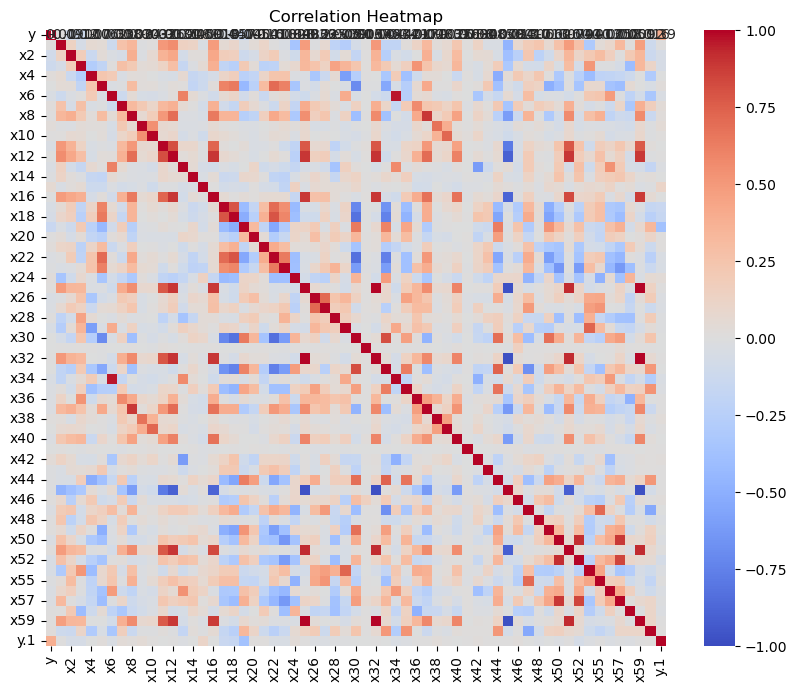

In [18]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [19]:
model = RandomForestClassifier()

In [20]:
# Step 7: Model Training
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
# Step 8: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9951033732317737
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3648
           1       0.92      0.39      0.55        28

    accuracy                           1.00      3676
   macro avg       0.96      0.70      0.77      3676
weighted avg       0.99      1.00      0.99      3676



In [22]:
# Step 9: Hyperparameter Tuning/Model Improvement
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

In [23]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)


In [25]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [26]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
